# Plot Evaluation Period Objective Function KGE-NP CDFs

In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np

import string
import cartopy
import cartopy.crs as ccrs
import seaborn as sns
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

from pathlib import Path
from glob import glob

## Set Paths

In [ ]:
ROOT = Path("/gpfs/work1/0/wtrcycle/users/jaerts/camels_uk/")
RESULTS = Path(f"{ROOT}/results/")
AUXDATA = Path(f"{ROOT}/aux_data/")

## Set Config

In [ ]:
# Set Files
basins_shp = f"{AUXDATA}/CAMELS-GB/data/CAMELS_GB_catchment_boundaries/CAMELS_GB_catchment_boundaries.shp"

wflow_calibrated_csv = f"{RESULTS}/wflow_sbm/wflow_calibrated_evaluation_objective_functions_overview.csv"
wflow_uncalibrated_csv = f"{RESULTS}/wflow_sbm/wflow_uncalibrated_evaluation_objective_functions_overview.csv"
pcrglob_csv = f"{RESULTS}/pcr-globwb/pcr-globwb_evaluation_period_objective_functions_overview.csv"

# Load available basin_IDs
df_basin_ids = pd.read_csv(f"{AUXDATA}/available_basin_ids_uncertainty.csv", index_col='basin_id')

## Load results dataframe

In [ ]:
df_wflow_calibrated = pd.read_csv(wflow_calibrated_csv, index_col='basin_id')
df_wflow_uncalibrated = pd.read_csv(wflow_uncalibrated_csv, index_col='basin_id')
df_pcrglob = pd.read_csv(pcrglob_csv, index_col='basin_id')

## Combine results dataframes and select available ids

In [ ]:
df = df_basin_ids.join(df_wflow_calibrated, rsuffix='_wflow_calibrated')
df = df.join(df_wflow_uncalibrated, rsuffix='_wflow_uncalibrated')
df = df.join(df_pcrglob, rsuffix='_pcrglob')

# Drop NaN values
df = df[df['kge_np'].notna()]

## Sort values and rank for CDF

In [ ]:
# Sort values
kge_np_wflow_calibrated = np.sort(df['kge_np'])
kge_np_wflow_uncalibrated = np.sort(df['kge_np_wflow_uncalibrated'])
kge_np_pcrglob = np.sort(df['kge_np_pcrglob'])

kge_np_beta_wflow_calibrated = np.sort(df['kge_np_beta'])
kge_np_beta_wflow_uncalibrated = np.sort(df['kge_np_beta_wflow_uncalibrated'])
kge_np_beta_pcrglob = np.sort(df['kge_np_beta_pcrglob'])

kge_np_alpha_wflow_calibrated = np.sort(df['kge_np_alpha'])
kge_np_alpha_wflow_uncalibrated = np.sort(df['kge_np_alpha_wflow_uncalibrated'])
kge_np_alpha_pcrglob = np.sort(df['kge_np_alpha_pcrglob'])

kge_np_r_wflow_calibrated = np.sort(df['kge_np_r'])
kge_np_r_wflow_uncalibrated = np.sort(df['kge_np_r_wflow_uncalibrated'])
kge_np_r_pcrglob = np.sort(df['kge_np_r_pcrglob'])

# Calculate rank ECDF
kge_y = np.arange(1, len(kge_np_wflow_calibrated)+1) / len(kge_np_wflow_calibrated)

## Plot evaluation period CDFs

/scratch-local/jaerts.2598960/ipykernel_3560581/2897338835.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(labels)


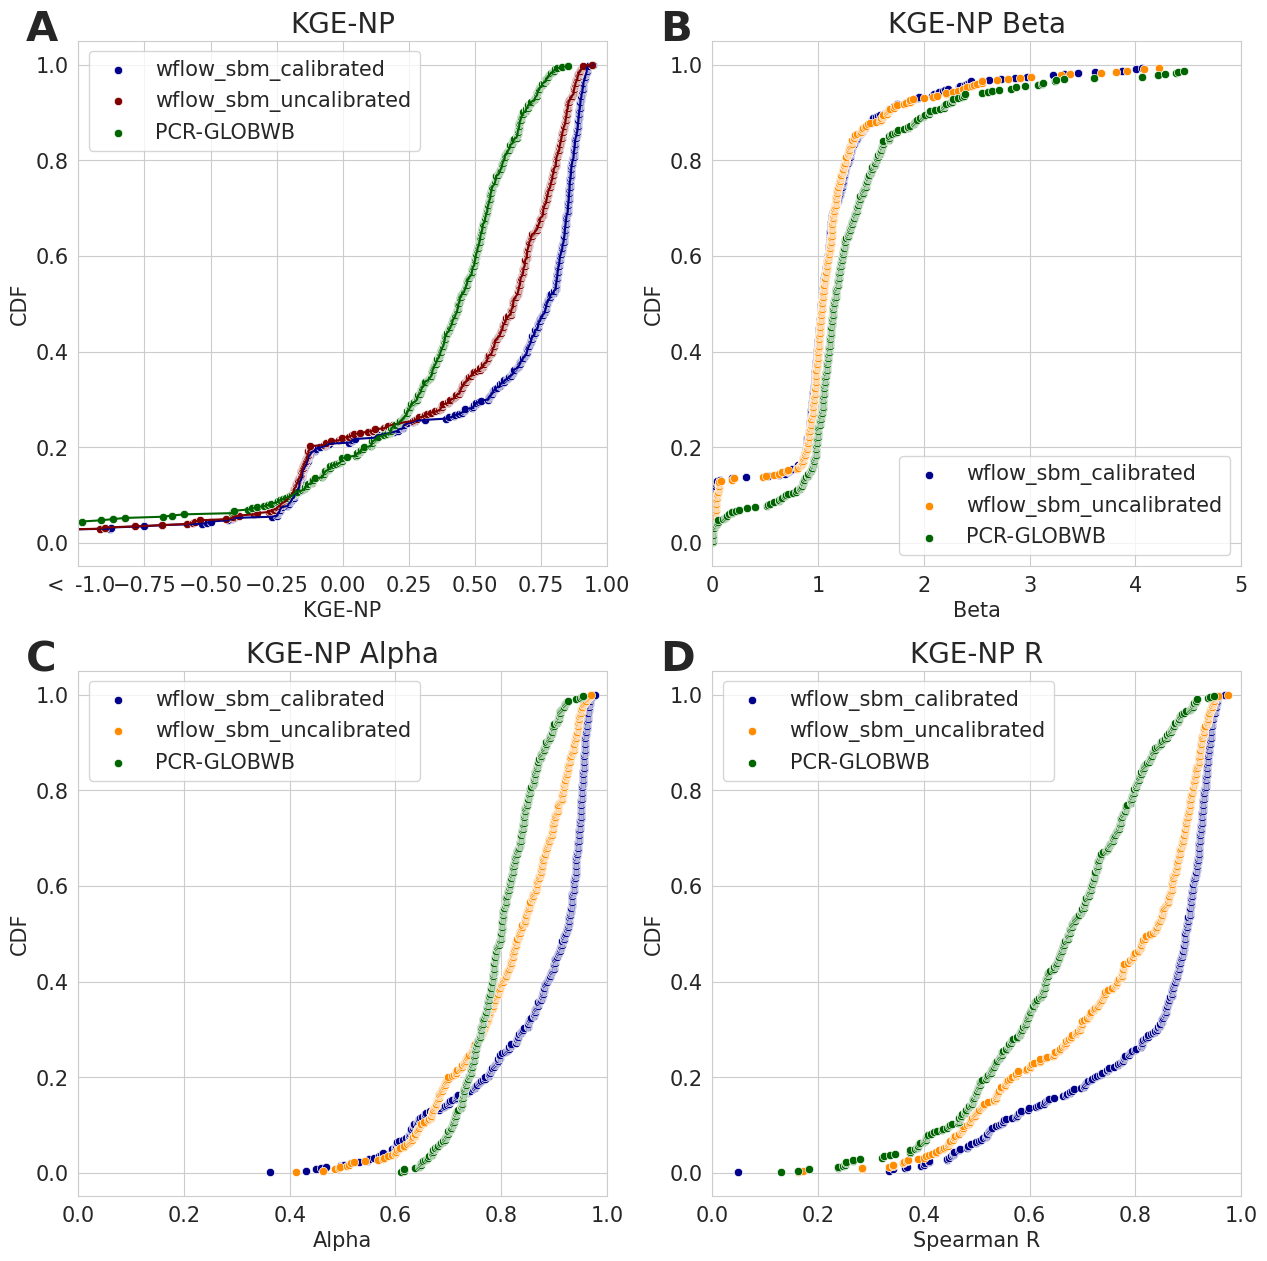

In [ ]:
# Plot Figure
matplotlib.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(2,2, figsize=(15, 15))

sns.lineplot(ax=axes[0,0], x=kge_np_wflow_calibrated, y=kge_y,color='darkblue')
sns.scatterplot(ax=axes[0,0], x=kge_np_wflow_calibrated, y=kge_y, label='wflow_sbm_calibrated', color='darkblue')

sns.lineplot(ax=axes[0,0], x=kge_np_wflow_uncalibrated, y=kge_y,  color='darkorange')
sns.scatterplot(ax=axes[0,0], x=kge_np_wflow_uncalibrated, y=kge_y, label='wflow_sbm_uncalibrated', color='darkorange')

sns.lineplot(ax=axes[0,0], x=kge_np_pcrglob, y=kge_y, color='darkgreen')
sns.scatterplot(ax=axes[0,0], x=kge_np_pcrglob, y=kge_y, label='PCR-GLOBWB', color='darkgreen')

axes[0,0].set_title('KGE-NP', size=20)
axes[0,0].set_xlim(-1,1)
axes[0,0].set_xlabel('KGE-NP')
axes[0,0].set_ylabel('CDF')

sns.scatterplot(ax=axes[0,1], x=kge_np_beta_wflow_calibrated, y=kge_y, label='wflow_sbm_calibrated', color='darkblue')
sns.scatterplot(ax=axes[0,1], x=kge_np_beta_wflow_uncalibrated, y=kge_y, label='wflow_sbm_uncalibrated', color='darkorange')
sns.scatterplot(ax=axes[0,1], x=kge_np_beta_pcrglob, y=kge_y, label='PCR-GLOBWB', color='darkgreen')

axes[0,1].set_title('KGE-NP Beta', size=20)
axes[0,1].set_xlim(0,5)
axes[0,1].set_xlabel('Beta')
axes[0,1].set_ylabel('CDF')

sns.scatterplot(ax=axes[1,0], x=kge_np_alpha_wflow_calibrated, y=kge_y, label='wflow_sbm_calibrated', color='darkblue')
sns.scatterplot(ax=axes[1,0], x=kge_np_alpha_wflow_uncalibrated, y=kge_y, label='wflow_sbm_uncalibrated', color='darkorange')
sns.scatterplot(ax=axes[1,0], x=kge_np_alpha_pcrglob, y=kge_y, label='PCR-GLOBWB', color='darkgreen')

axes[1,0].set_title('KGE-NP Alpha', size=20)
axes[1,0].set_xlim(0,1)
axes[1,0].set_xlabel('Alpha')
axes[1,0].set_ylabel('CDF')


sns.scatterplot(ax=axes[1,1], x=kge_np_r_wflow_calibrated, y=kge_y, label='wflow_sbm_calibrated', color='darkblue')
sns.scatterplot(ax=axes[1,1], x=kge_np_r_wflow_uncalibrated, y=kge_y, label='wflow_sbm_uncalibrated', color='darkorange')
sns.scatterplot(ax=axes[1,1], x=kge_np_r_pcrglob, y=kge_y, label='PCR-GLOBWB', color='darkgreen')

axes[1,1].set_title('KGE-NP R', size=20)
axes[1,1].set_xlim(0,1)
axes[1,1].set_xlabel('Spearman R')
axes[1,1].set_ylabel('CDF')




fig.canvas.draw()


labels = [item.get_text() for item in axes[0,0].get_xticklabels()]
labels[0] = r'$<$ -1.0' 
labels
axes[0,0].set_xticklabels(labels)
# # axes[1,1].set_xticklabels(labels)

axes = axes.flat
for n, ax in enumerate(axes):
    ax.text(-0.1, 1.0, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=30, weight='bold')
    
    

# plt.savefig(f'{ROOT}/plots/fig_evaluation_period_cdfs.png', bbox_inches='tight')

# Plot KGE-NP, NSE, differences

In [ ]:
# Sort values
kge_nse_wflow_calibrated = np.sort(df['nse'])
kge_nse_wflow_uncalibrated = np.sort(df['nse_wflow_uncalibrated'])
kge_nse_pcrglob = np.sort(df['nse_pcrglob'])

/scratch-local/jaerts.2598960/ipykernel_3560581/2543360243.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(labels)
/scratch-local/jaerts.2598960/ipykernel_3560581/2543360243.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(labels)


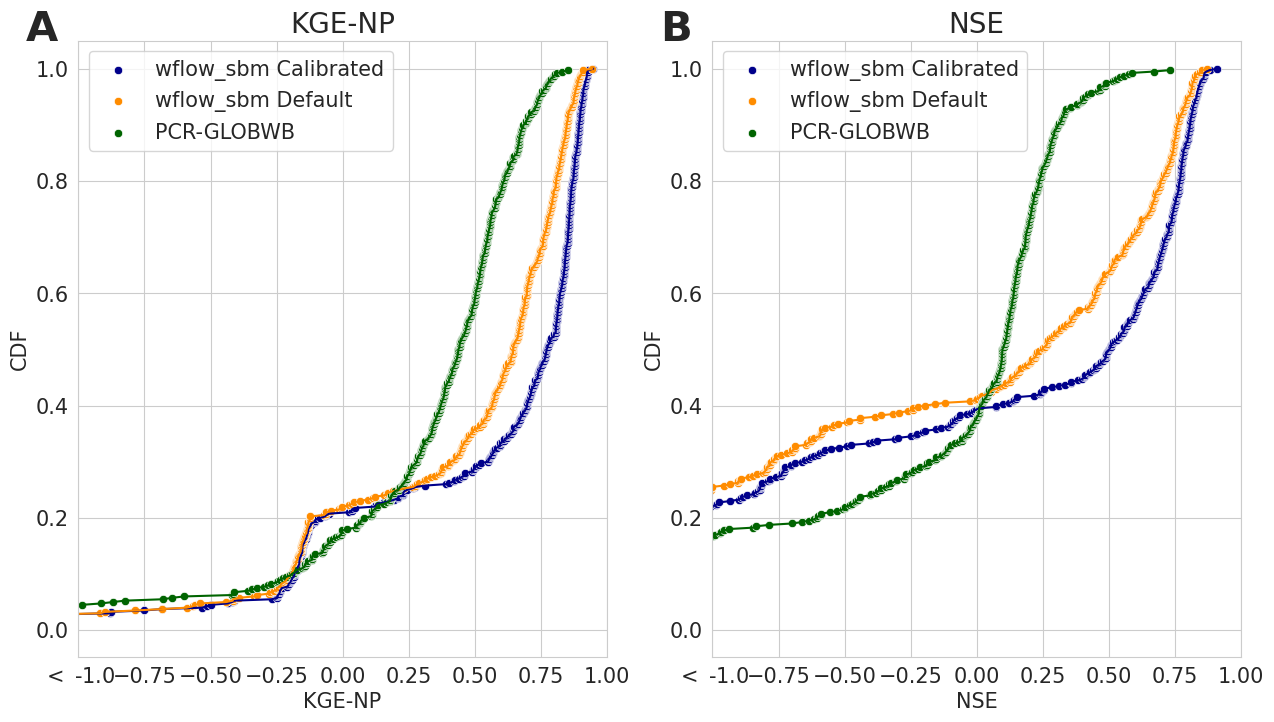

In [22]:
# Plot Figure
matplotlib.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(1,2, figsize=(15, 8))

sns.lineplot(ax=axes[0], x=kge_np_wflow_calibrated, y=kge_y, color='darkblue')
sns.scatterplot(ax=axes[0], x=kge_np_wflow_calibrated, y=kge_y, label='wflow_sbm Calibrated', color='darkblue')

sns.lineplot(ax=axes[0], x=kge_np_wflow_uncalibrated, y=kge_y, color='darkorange')
sns.scatterplot(ax=axes[0], x=kge_np_wflow_uncalibrated, y=kge_y, label='wflow_sbm Default', color='darkorange')

sns.lineplot(ax=axes[0], x=kge_np_pcrglob, y=kge_y, color='darkgreen')
sns.scatterplot(ax=axes[0], x=kge_np_pcrglob, y=kge_y, label='PCR-GLOBWB', color='darkgreen')

axes[0].set_title('KGE-NP', size=20)
axes[0].set_xlim(-1,1)
axes[0].set_xlabel('KGE-NP')
axes[0].set_ylabel('CDF')

sns.lineplot(ax=axes[1], x=kge_nse_wflow_calibrated, y=kge_y, color='darkblue')
sns.scatterplot(ax=axes[1], x=kge_nse_wflow_calibrated, y=kge_y, label='wflow_sbm Calibrated', color='darkblue')

sns.lineplot(ax=axes[1], x=kge_nse_wflow_uncalibrated, y=kge_y, color='darkorange')
sns.scatterplot(ax=axes[1], x=kge_nse_wflow_uncalibrated, y=kge_y, label='wflow_sbm Default', color='darkorange')

sns.lineplot(ax=axes[1], x=kge_nse_pcrglob, y=kge_y, color='darkgreen')
sns.scatterplot(ax=axes[1], x=kge_nse_pcrglob, y=kge_y, label='PCR-GLOBWB', color='darkgreen')

axes[1].set_title('NSE', size=20)
axes[1].set_xlim(-1,1)
axes[1].set_xlabel('NSE')
axes[1].set_ylabel('CDF')

# sns.scatterplot(ax=axes[1,0], x=kge_np_alpha_wflow_calibrated, y=kge_y, label='wflow_sbm_calibrated', color='darkblue')
# sns.scatterplot(ax=axes[1,0], x=kge_np_alpha_wflow_uncalibrated, y=kge_y, label='wflow_sbm_uncalibrated', color='darkorange')
# sns.scatterplot(ax=axes[1,0], x=kge_np_alpha_pcrglob, y=kge_y, label='PCR-GLOBWB', color='darkgreen')

# axes[1,0].set_title('KGE-NP Alpha', size=20)
# axes[1,0].set_xlim(0,1)
# axes[1,0].set_xlabel('Alpha')
# axes[1,0].set_ylabel('CDF')


# sns.scatterplot(ax=axes[1,1], x=kge_np_r_wflow_calibrated, y=kge_y, label='wflow_sbm_calibrated', color='darkblue')
# sns.scatterplot(ax=axes[1,1], x=kge_np_r_wflow_uncalibrated, y=kge_y, label='wflow_sbm_uncalibrated', color='darkorange')
# sns.scatterplot(ax=axes[1,1], x=kge_np_r_pcrglob, y=kge_y, label='PCR-GLOBWB', color='darkgreen')

# axes[1,1].set_title('KGE-NP R', size=20)
# axes[1,1].set_xlim(0,1)
# axes[1,1].set_xlabel('Spearman R')
# axes[1,1].set_ylabel('CDF')




fig.canvas.draw()


labels = [item.get_text() for item in axes[0].get_xticklabels()]
labels[0] = r'$<$ -1.0' 
labels
axes[0].set_xticklabels(labels)
axes[1].set_xticklabels(labels)

axes = axes.flat
for n, ax in enumerate(axes):
    ax.text(-0.1, 1.0, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=30, weight='bold')
    
    

plt.savefig(f'{ROOT}/plots/fig_evaluation_period_cdfs.png', bbox_inches='tight', dpi=300)

In [22]:
np.median(kge_nse_wflow_calibrated)

0.5035142857142856

In [21]:
np.median(kge_nse_wflow_uncalibrated)

0.2498142857142857

In [19]:
np.median(kge_nse_pcrglob)

nan

In [20]:
np.median(kge_nse_pcrglob[:-1])

0.0974142857142857